Data Analysis Y3 - Continuous Assessment 2
05/12/2024
Time: 90 Minutes

Notes:

- Answer all the questions
- Save and Uplaod your answers as a notebook to BS.
- This CA is closed-book. Student is not allowed to open lecture notes, labs or brows the web during the CA hours.

#1- Seaborn

1. Import seanborn Library

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

2. load and read the head of the seaborn built-in dataset "car_crashes".

In [6]:
car_crashes = sns.load_dataset("car_crashes")
print(car_crashes.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


3. Create a pairplot to visualize relationships between the whole dataset.

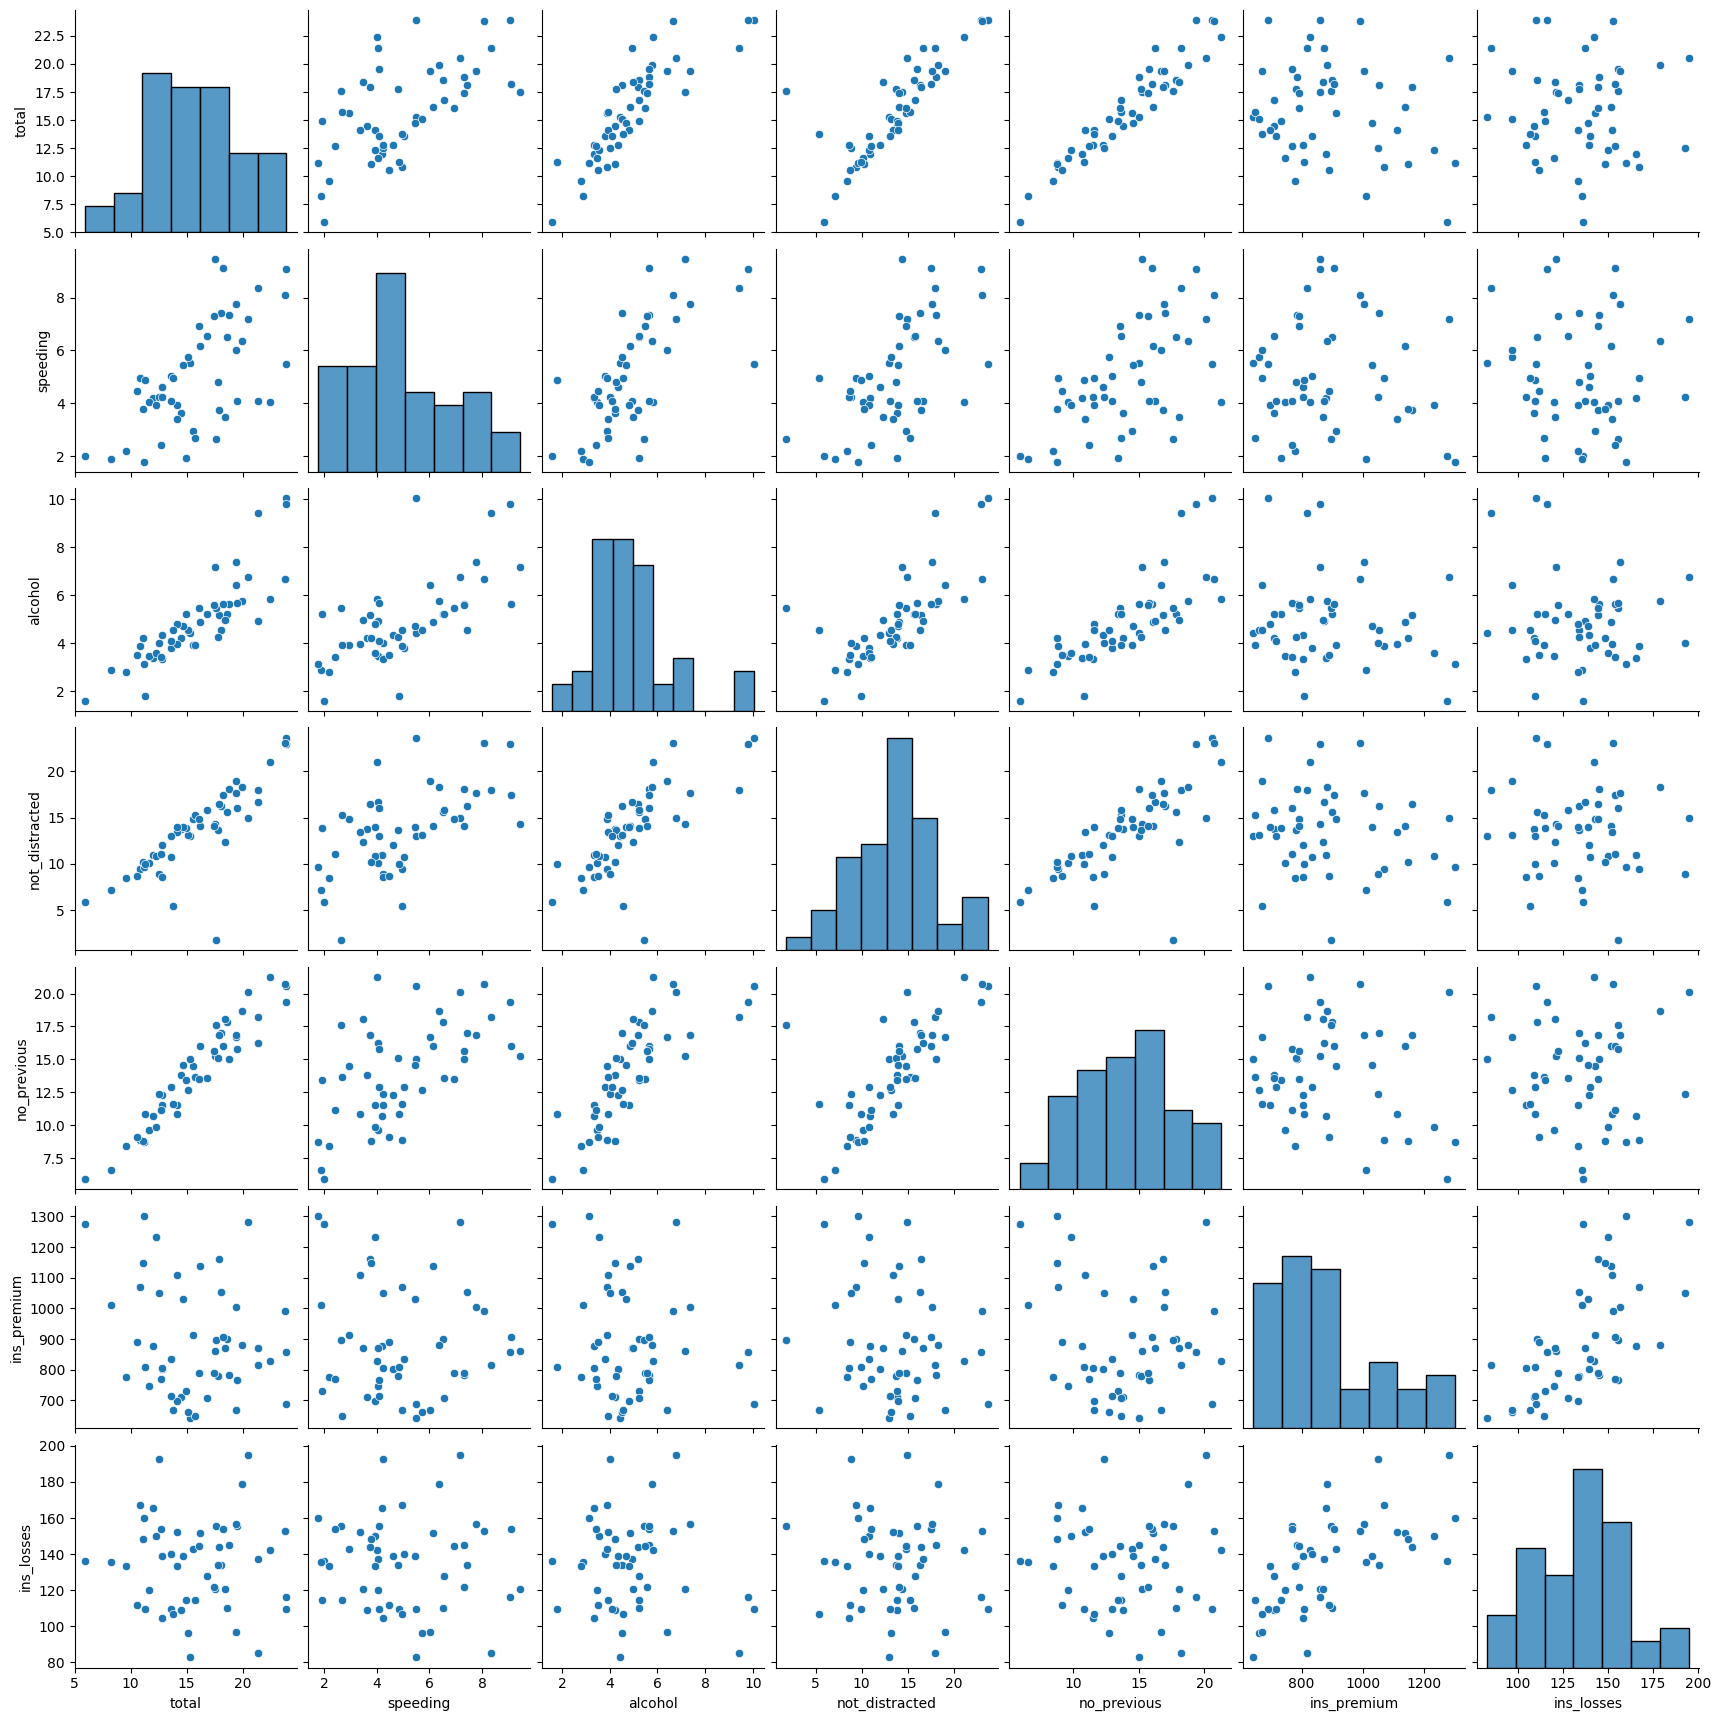

In [7]:
car_crashes = sns.load_dataset("car_crashes")

sns.pairplot(car_crashes)

plt.show()

4. Enhance the above pairplot by adding color based on the number of speeding-related crashes.

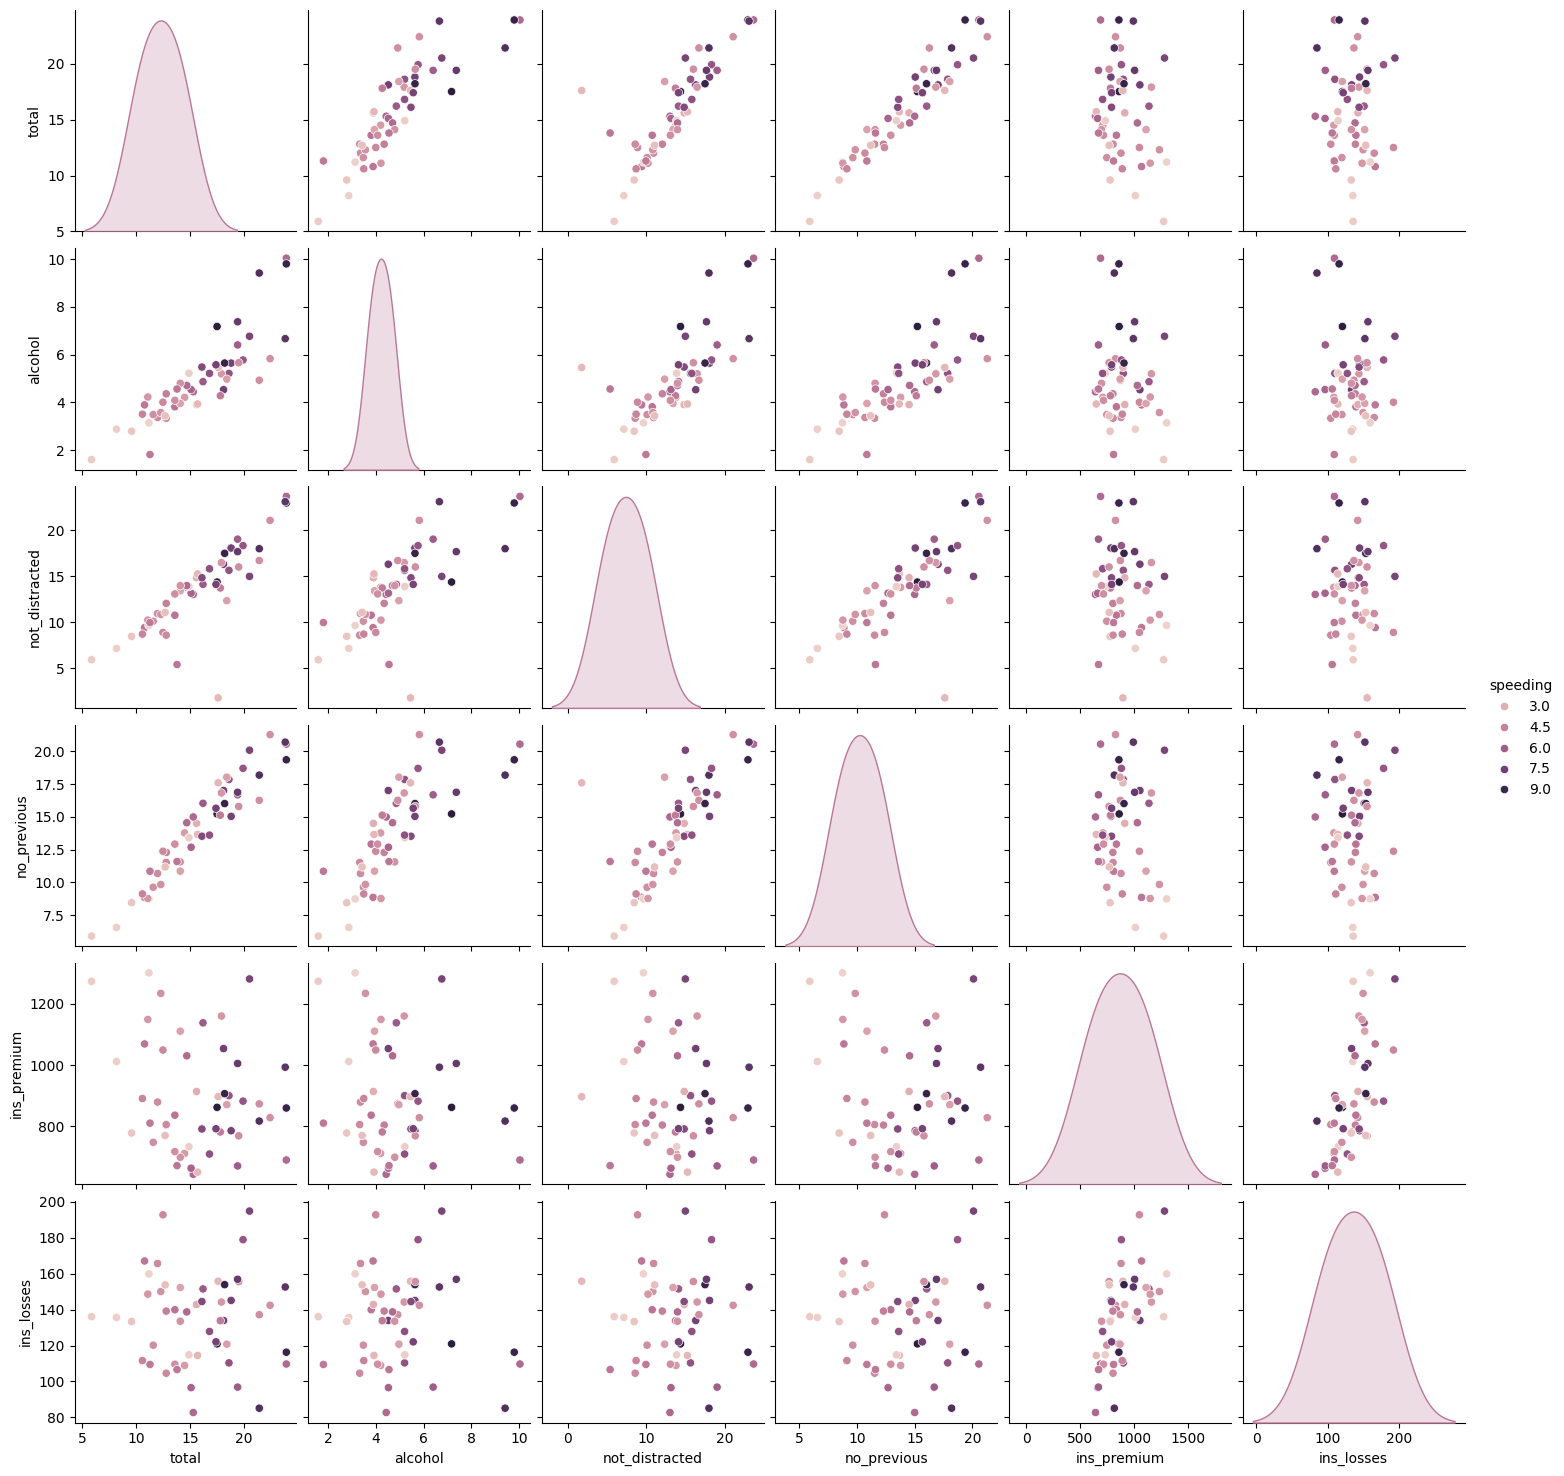

In [8]:
car_crashes = sns.load_dataset("car_crashes")

sns.pairplot(car_crashes, hue="speeding")

plt.show()

5. Create a barplot to visualize the total number of crashes for different states.

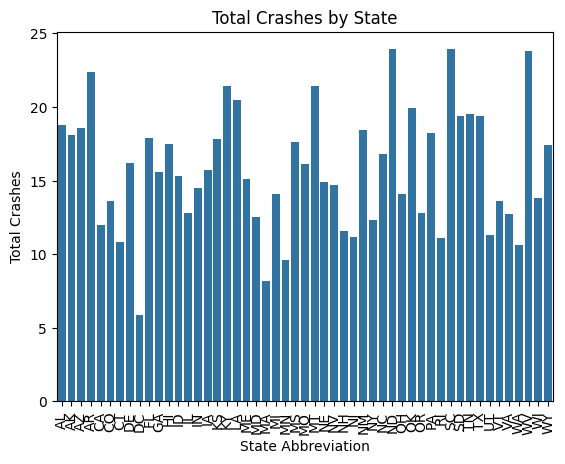

In [10]:
car_crashes = sns.load_dataset("car_crashes")

sns.barplot(x="abbrev", y="total", data=car_crashes)

plt.title("Total Crashes by State")
plt.xlabel("State Abbreviation")
plt.ylabel("Total Crashes")

plt.xticks(rotation=90)

plt.show()

6.Create a heatmap to visualize the correlation between numerical variables.

In [16]:
car_crashes = sns.load_dataset("car_crashes")

correlation_matrix = car_crashes.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()


ValueError: could not convert string to float: 'AL'

7. Create a countplot to visualize the distribution of alcohol-related crashes.

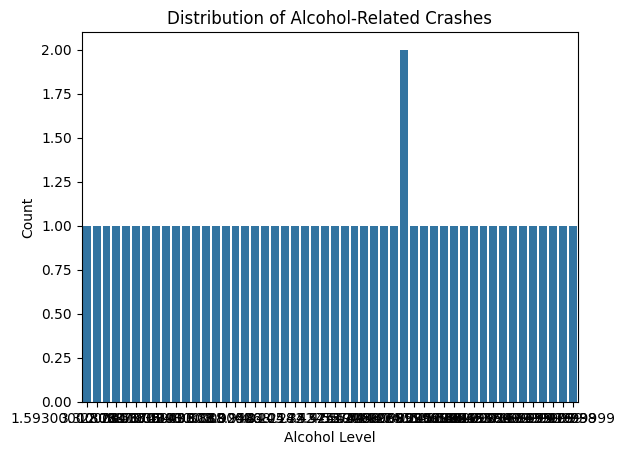

In [17]:
car_crashes = sns.load_dataset("car_crashes")

sns.countplot(x="alcohol", data=car_crashes)

plt.title("Distribution of Alcohol-Related Crashes")
plt.xlabel("Alcohol Level")
plt.ylabel("Count")

plt.show()

8. Create a scatter plot to explore the relationship between the percentage of crashes involving speeding and the total number of crashes.

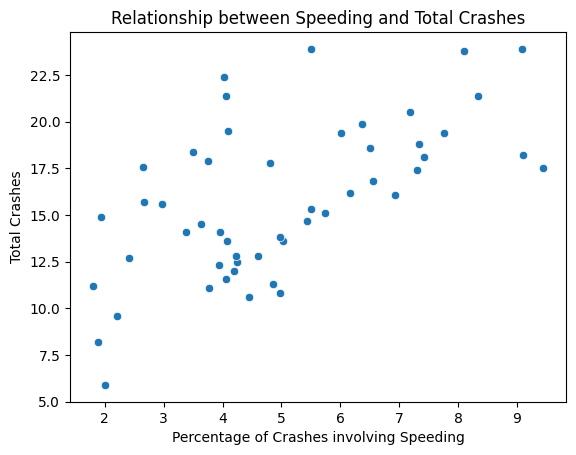

In [18]:
car_crashes = sns.load_dataset("car_crashes")

sns.scatterplot(x="speeding", y="total", data=car_crashes)

plt.title("Relationship between Speeding and Total Crashes")
plt.xlabel("Percentage of Crashes involving Speeding")
plt.ylabel("Total Crashes")

plt.show()

#2.Data Pre-processing

1.Import necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

2. Load the Titanic dataset (titanic)
3. Display the first 10 rows.
4. Provide a summary of the dataset.

In [22]:
data = pd.read_csv("titanic.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


5. Display the shape of the dataset.
6. Count the number of missing values in each column.
7. Identify the column with the highest percentage of missing values

In [24]:
data = pd.read_csv("titanic.csv")
print("The Shape of the dataset:")
print()
data.shape

The Shape of the dataset:



(891, 12)

In [25]:
# counting number of values
data.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [26]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
# identifying column with high percentage
data.isnull().sum() / len(data) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


8. Fill missing values in the Age column with the median age.
9. Drop rows where the Embarked column is missing.
10. Check for and remove duplicate rows.

In [29]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
# Dropped missing rows
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [31]:
data.fillna('median age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,median age,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,median age,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,median age,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,median age,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,median age,1,2,W./C. 6607,23.4500,median age,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
data.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


12. Convert the Pclass column to a categorical data type.
13. Add a new column FamilySize by summing the SibSp and Parch columns.

In [33]:
data['Pclass'] = data['Pclass'].astype('category')

In [34]:
data['FamilySize'] = data['SibSp'] + data['Parch']

14.Save the cleaned dataset as cleaned_titanic.csv.

In [36]:
data.to_csv('cleaned_titanic.csv')



#3. Linear Regression

1. Libraries:
import the necessary libraries to perfrom a linear regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Load and read cancer death dataset "cancer_data" using Pandas

In [38]:
cancer_data = pd.read_csv("cancer_data.csv")
print(cancer_data.head())

   avg. reported cases  avg.deaths per year  target_deathrate  incidence rate  \
0               1397.0                  469             164.9           489.8   
1                173.0                   70             161.3           411.6   
2                102.0                   50             174.7           349.7   
3                427.0                  202             194.8           430.4   
4                 57.0                   26             144.4           350.1   

   Avg. income  poverty percent  male age  female age  percent married  
0        61898             11.2      36.9        41.7             52.5  
1        48127             18.6      32.2        33.7             44.5  
2        49348             14.6      44.0        45.8             54.2  
3        44243             17.1      42.2        43.4             52.7  
4        49955             12.5      47.8        48.9             57.8  


3. Set your variables as follows:

- x = ('avg. reported cases', 'avg. deaths per year', 'incidence rate', 'Avg. income', 'poverty percent', 'male age', 'female age', 'percent married')
- y = (target_deathrate)

In [39]:
x =  ['avg. reported cases', 'avg. deaths per year', 'incidence rate', 'Avg. income',
'poverty percent', 'male age', 'female age', 'percent married']
y = 'target_deathrate'

4. Split the dataset into training and testing sets, allocate 30% of the data for testing

In [43]:
X = cancer_data[['avg. reported cases', 'avg.deaths per year', 'incidence rate', 'Avg. income', 'poverty percent', 'male age', 'female age', 'percent married']]
y = cancer_data['target_deathrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Create a linear regression model and train it on the training set.

In [44]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

6. Use the trained model to make predictions on the test set.

In [45]:
y_pred = model.predict(X_test)

7. Print the coefficients and intercept of the linear regression model.

In [46]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-5.75529546e-03  1.13203871e-02  2.32493397e-01 -4.62447712e-04
  1.03175000e+00 -2.40441290e-01  3.63040956e-01  2.53452092e-02]
Intercept: 73.11283838375725


8. Create scatter plots to visualize the predicted vs. actual values.

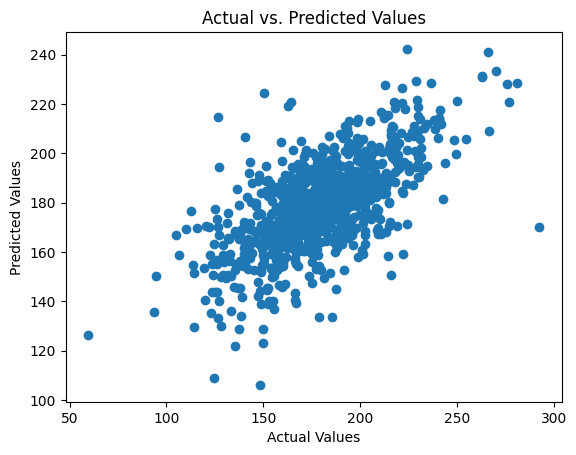

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# 4.  Hypothsis Testing

Background:

A University is exploring the effectiveness of a new teaching method aimed at improving student performance. The University collected data from two groups of students – one group taught using the traditional method (Group A), and another group taught using the new method (Group B). Additionally, the institute conducted a survey to gather feedback from the students before and after implementing the new method.

1. Two-Sample T-Test for Academic Performance:
Is there a significant difference in the mean academic performance scores between students taught using the traditional method (Group A) and the new teaching method (Group B)?
- Hypotheses:

Null Hypothesis (H0): There is no significant difference in the mean academic performance scores between Group A and Group B.

Alternative Hypothesis (H1): There is a significant difference in the mean academic performance scores between Group A and Group B.

1. Load and read the dataset "academic_performance" using Pandas

In [49]:
academic_data = pd.read_csv("academic_performance.csv")

2. Perform a two-sample t-test to compare the mean academic performance scores between Group A and Group B.
Alph =0.05

In [50]:
from scipy.stats import ttest_ind

In [51]:
group_a_scores = academic_data[academic_data['Group'] == 'A']['Academic Performance']
group_b_scores = academic_data[academic_data['Group'] == 'B']['Academic Performance']

t_statistic, p_value = ttest_ind(group_a_scores, group_b_scores)

In [52]:
alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in the mean academic performance scores between Group A and Group B.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the mean academic performance scores between Group A and Group B.")

Reject the null hypothesis. There is a significant difference in the mean academic performance scores between Group A and Group B.


Your Hypothsis Answer:

2. Paired T-Test for Feedback:
- Is there a significant change in student feedback before and after the introduction of the new teaching method?
- Hypotheses:
Null Hypothesis (H0): There is no significant change in the mean feedback scores before and after the introduction of the new teaching method.
Alternative Hypothesis (H1): There is a significant change in the mean feedback scores before and after the introduction of the new teaching method.



1. Using the same dataset, Perform a paired t-test to compare the mean feedback scores before and after the intervention.

In [53]:
from scipy.stats import ttest_rel

feedback_before = academic_data['FeedbackBefore']
feedback_after = academic_data['FeedbackAfter']

t_statistic, p_value = ttest_rel(feedback_before, feedback_after)

In [56]:
lpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant change in the mean feedback scores before and after the introduction of the new teaching method.")
else:
    print("Fail to reject the null hypothesis. There is no significant change in the mean feedback scores before and after the introduction of the new teaching method.")

Reject the null hypothesis. There is a significant change in the mean feedback scores before and after the introduction of the new teaching method.


Your Hypothsis Answer:Reject the null hypothesis. There is a significant change in the mean feedback scores and before and after the introduction of the new teaching method.

#Save your answers and upoloead them as .ipynb